In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2 as cv
import pydicom
from skimage import exposure
from matplotlib import pyplot as plt

In [2]:
img = pydicom.dcmread('/mnt/e/ImagensDataset/00012_20990909_R_MLO_1.dcm')
imgArray = np.array(img.pixel_array)
bits = np.arange(65537)

[    0     1     2 ... 65534 65535 65536]


# Calculando o Histograma da Imagem 
* Obs: A imagem e 16bits, portanto a faixa de valores é muito maior que o normal de outras imagens, portante eh necessario calcular atraves de outras bibliotecas, opencv nao funciona.
#### # Histograma 
`Histograma eh um grafico de barras que demonstra uma distribuicao de frequencias de uma determinado tipo de variavel`
* No processamento de imagens:
- Representa um grafico de frequencias de intensidade de pixels na imagem. Representa o numero de pixels para cada intensidade de valor considerado.

In [40]:
imgEqualize = exposure.equalize_hist(imgArray)
hist, bin = np.histogram(imgEqualize.ravel(), bins=bits, range=65536)

In [44]:
df = pd.DataFrame({"Intensity": np.arange(0,len(hist)),"Count": hist})
df

,Intensity,Count
0,0,13623956
1,1,7532
2,2,0
3,3,0
4,4,0
...,...,...
65531,65531,0
65532,65532,0
65533,65533,0
65534,65534,0


/home/lukas-machado/miniconda3/envs/envITI/lib/python3.10/site-packages/seaborn/distributions.py:410: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


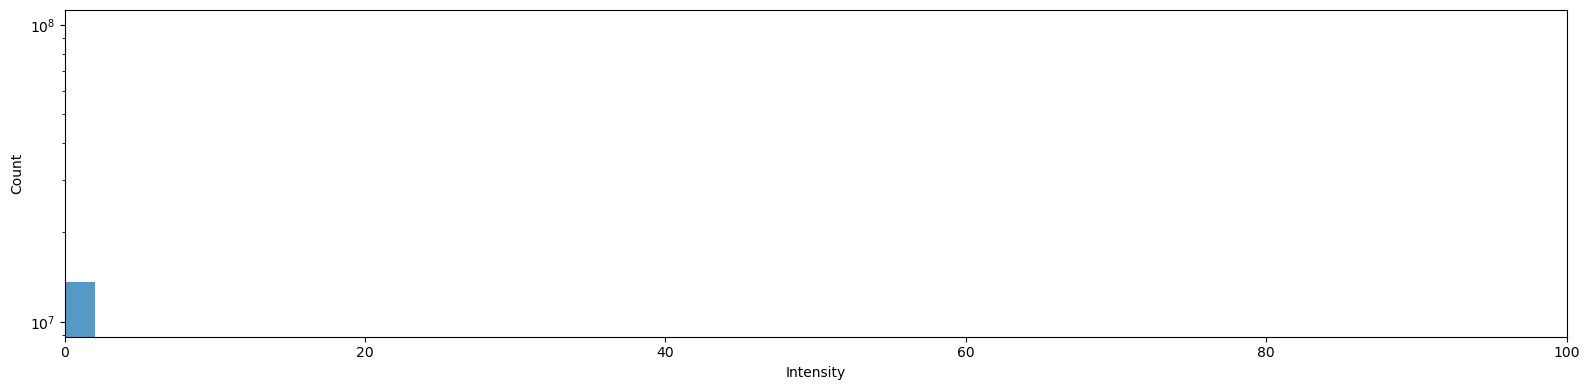

In [49]:
fig = plt.figure(figsize=(16,4))
ax = sns.histplot(data=df,x="Intensity",weights="Count",bins=np.arange(0,65537,2),binrange=(0,65536))
plt.semilogy()
plt.xlim(0,100)
fig.tight_layout()
plt.show()

In [5]:
# Imagem DICOM 
#imgName = img.filename.split('/')[-1]
#fig1, ax1 = plt.subplots()
#ax1.set_title(imgName)
#ax1.imshow(imgArray, cmap="gray")

# Histograma da Imagem
def plot_histogram(arrayImg, nroBinsGraph, bits):
    hist, bin = np.histogram(arrayImg.ravel(), bins=bits, range=65536)
    sticks = list(map(str,np.arange(0,nroBinsGraph+1, 50).tolist()))
    fig2, ax2 = plt.subplots()
    fig2.set_size_inches(25,5)
    ax2.set_facecolor('k')
    ax2.ticklabel_format(useOffset=True, style='plain')
    ax2.bar(bin[:-1], hist, width=0.6, align='center', color='r')
    ax2.set_xlabel("Intensidade do Pixel")
    ax2.set_ylabel("Quantidade")
    ax2.set_title("Histograma de Intensidade de Pixel")
    ax2.set_xticks(np.arange(0,(nroBinsGraph+1),50), sticks, horizontalalignment='center', rotation=90)
    ax2.semilogy()
    ax2.set_xlim(0,nroBinsGraph)
    fig2.tight_layout()
    plt.show();

In [39]:
# Equalizando histograma
imgEqualize = exposure.equalize_hist(imgArray)
nroBits = np.arange(65537)
plot_histogram(imgEqualize.ravel(),5000,nroBits)
plot_histogram(imgArray.ravel(),5000,nroBits)

[[0.69670017 0.69670017 0.69670017 ... 0.69670017 0.69670017 0.69670017]
 [0.69670017 0.69670017 0.69670017 ... 0.69670017 0.69670017 0.69670017]
 [0.69670017 0.69670017 0.69670017 ... 0.69670017 0.69670017 0.69670017]
 ...
 [0.69670017 0.69670017 0.69670017 ... 0.69670017 0.69670017 0.69670017]
 [0.69670017 0.69670017 0.69670017 ... 0.69670017 0.69670017 0.69670017]
 [0.69670017 0.69670017 0.69670017 ... 0.69670017 0.69670017 0.69670017]]
[13623956     7532        0 ...        0        0        0]


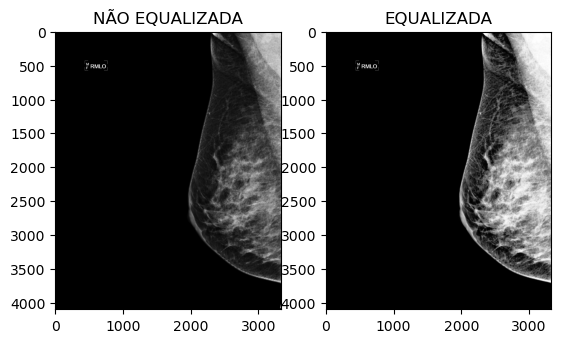

In [26]:
fig1, axs = plt.subplots(1,2)
axs[0].set_title("NÃO EQUALIZADA")
axs[0].imshow(imgArray, cmap="gray")
axs[1].set_title("EQUALIZADA")
axs[1].imshow(imgEqualize, cmap="gray")

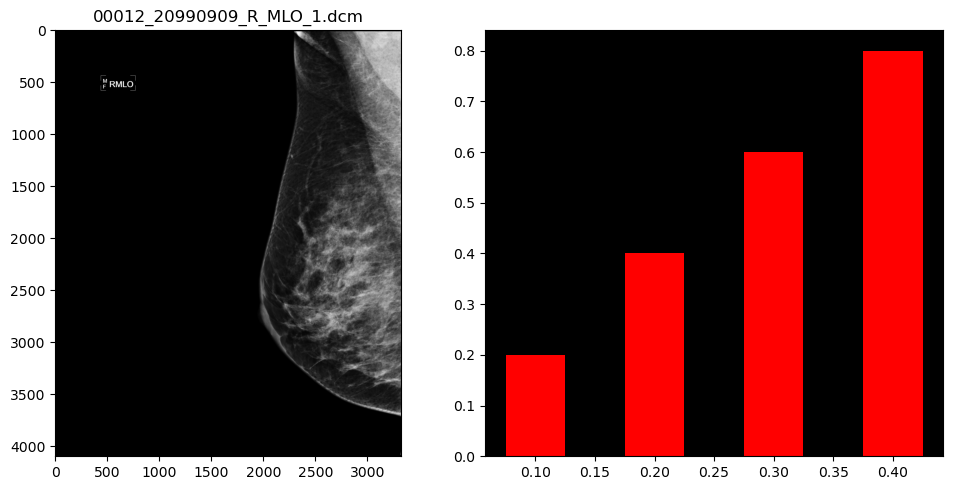

In [74]:
# Testando algumas funcoes do matplotlib
imgName = img.filename.split('/')[-1]
fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,5)
axs[0].set_title(imgName)
axs[0].imshow(imgArray, cmap="gray")

t1 = np.arange(0.1, 0.5, 0.1)
bar_width = 0.8
axs[1].set_facecolor('k') # define a cor do background da imagem
axs[1].bar(t1,list(map(lambda x: x*2,t1)),color='r',width=0.05)

fig.tight_layout()
plt.show()